# Webscrape on eBay

The goal for this notebook is to showcase how to webscrape listing items on eBay using BeautifulSoup. We will search for iPhone15's data.

Searching "iPhone15" on eBay:
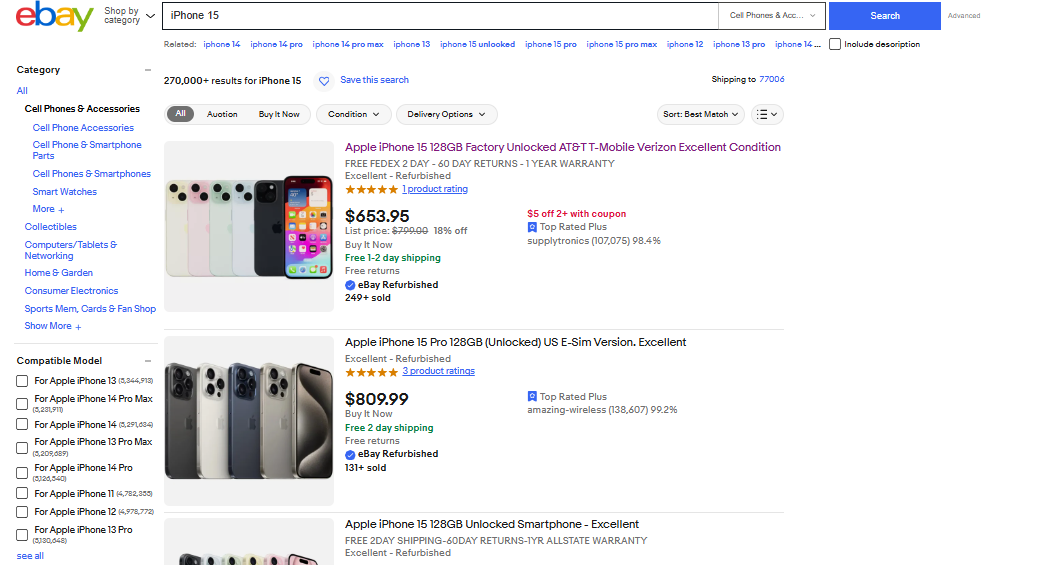

Let's copy the link and start scraping.



## 1. Get webpages using requests

In [1]:
import requests

req = requests.get('https://www.ebay.com/sch/i.html?_from=R40&_trksid=p4432023.m570.l1313&_nkw=iPhone+15&_sacat=0')

In [2]:
webpage = req.text

## 2. Get specific contents using BeautifulSoup

In [3]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(webpage, 'html.parser')

### 2.1 Prettify the webpage

In [4]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 9]><html class="ie9" lang="en"><![endif]-->
<!--[if gt IE 9]><!-->
<html lang="en">
 <!--<![endif]-->
 <!--M#s0-2-->
 <noscript class="x-page-config">
 </noscript>
 <!--M/-->
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script>
   (function () {
        'use strict';
        if (window.PerformanceObserver && performance && performance.mark && performance.getEntriesByName) {
            window.SRP = window.SRP || {};
            var paintObserver = new window.PerformanceObserver(function (list) {
                var paintEntries = list.getEntries();
                paintEntries.sort(function (a, b) {
                    return a.startTime - b.startTime;
                });
                // begin looking for TTI at first contentful paint
                if (!paintEntries || paintEntries.length < 2) {
                    // to avoid undefined issue on Safari
                    return;
                }
                var interactiveWin

### 2.2 Get the paragraphs

In [5]:
listing_items = soup.find_all("div", class_="s-item__info clearfix")

In [6]:
listing_items

[<div class="s-item__info clearfix"><!--F#f_11--><a _sp="" class="s-item__link" data-interactions='[{"actionKind":"NAVSRC","interaction":"wwFVrK2vRE0lhQY0MREUzME5KNVY2VE1XNkJEMTUAAAg3NDAwDE5BVlNSQwA="}]' data-s-qpqm449='{"eventFamily":"LST","eventAction":"ACTN","actionKind":"NAVSRC","actionKinds":["NAVSRC"],"operationId":"","flushImmediately":false,"eventProperty":{"trackableId":"01GDF2P4GS7EBZ8M2AWN707B","interaction":"wwFVrK2vRE0lhQY0MREUzME5KNVY2VE1XNkJEMTUAAAg3NDAwDE5BVlNSQwA="}}' href="https://ebay.com/itm/123456?itmmeta=012DEW30YG0MEEKND7NH&amp;hash=item123546:g:acwAA9KNiJowH:sc:ShippingMethodStandard!95008!US!-1&amp;itmprp=enc%3AbgepL1tlUHjMGCVfSTGJh%2BzsVKeJ3CQk7NizDI4BZeppuFnmyS6Ijyp8lh%2FnEw%2BWqO7uTV1Q6izE1R0T54aV8j71F4xlWfVcGft4%2FiOQhtqVXA1rW6M1atPARQRmhqUxtEPJKhKtSFgI%2Bvwlzb0GwVCtkp%3ABlBMUObkmabpYw" tabindex="-1" target="_blank"><div class="s-item__title"><span aria-level="3" role="heading"><!--F#f_0-->Shop on eBay<!--F/--></span></div><span class="clipped">Opens in a n

In [7]:
data = {"title":[], "url":[], "price":[]}
for item in listing_items:
    
    # find the texts
    title = item.find("div", class_="s-item__title").text.strip()
    url = item.find("a", class_="s-item__link")["href"]
    price = item.find("span", class_="s-item__price").text.strip()
    
    # append to the lists inside the dictionary
    data["title"].append(title)
    data["url"].append(url)
    data["price"].append(price)

In [8]:
import pandas as pd
df = pd.DataFrame(data)

In [9]:
df

,title,url,price
0,Shop on eBay,https://ebay.com/itm/123456?itmmeta=012DEW30YG...,$20.00
1,Shop on eBay,https://ebay.com/itm/123456?itmmeta=012DEW30YG...,$20.00
2,Apple iPhone 15 128GB Unlocked Smartphone - Ex...,https://www.ebay.com/itm/386904772514?epid=806...,$654.95
3,Apple iPhone 15 Pro 128GB (Unlocked) US E-Sim ...,https://www.ebay.com/itm/156078647276?epid=110...,$809.99
4,Apple iPhone 15 128GB Factory Unlocked AT&T T-...,https://www.ebay.com/itm/296110312917?epid=806...,$653.95
...,...,...,...
77,Apple iPhone 15 Pro - 128 GB - White Titanium(...,https://www.ebay.com/itm/387094892864?epid=606...,$675.00
78,New ListingiPhone 15 128gb (T-Mobile) Excellen...,https://www.ebay.com/itm/315451085571?epid=806...,$559.99
79,New ListingApple iPhone 15 Pro - 256 GB - Blac...,https://www.ebay.com/itm/405048443134?epid=260...,$689.00
80,Apple iPhone 15 A2846 T-Mobile Only 128GB Blue C,https://www.ebay.com/itm/186274945695?epid=230...,$479.99
